# Classic - AlexNet

In [7]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam

import matplotlib.pyplot as plt 
%matplotlib inline

## Prepare the data

In [2]:
# Load oxflower17 dataset
import tflearn.datasets.oxflower17 as oxflower17
from sklearn.model_selection import train_test_split

#Load data and Split train and test data
x, y = oxflower17.load_data(one_hot=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = True)

Instructions for updating:
non-resource variables are not supported in the long term


## Data augumentation

In [3]:
# Data augumentation with Keras tools
from keras.preprocessing.image import ImageDataGenerator

img_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

## Define the model

In [4]:
#Build AlexNet model
def AlexNet(width, height, depth, classes):
    
    model = Sequential()
    
    #First Convolution and Pooling layer
    model.add(Conv2D(96,(11,11),strides=(4,4),input_shape=(width,height,depth),padding='valid',activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    
    #Second Convolution and Pooling layer
    model.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    
    #Three Convolution layer and Pooling Layer
    model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    
    #Fully connection layer
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000,activation='relu'))
    model.add(Dropout(0.5))
    
    #Classfication layer
    model.add(Dense(classes,activation='softmax'))

    return model
  
AlexNet_model = AlexNet(224,224,3,17)
AlexNet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 256)       8

## Training and Fit

In [5]:
AlexNet_model.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
                      loss = 'categorical_crossentropy',
                      metrics=['accuracy'])

#Start training using dataaugumentation generator
History = AlexNet_model.fit(img_gen.flow(X_train*255, y_train, batch_size = 16),
                            steps_per_epoch = len(X_train)/16, 
                            validation_data = (X_test,y_test), 
                            epochs = 30 )

Epoch 1/30
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 2.8312 - acc: 0.0597

/Users/chenyu/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


68/68 [==============================] - 54s 775ms/step - batch: 33.5000 - size: 16.0000 - loss: 2.8312 - acc: 0.0597 - val_loss: 2.8298 - val_acc: 0.0515
Epoch 2/30
68/68 [==============================] - 54s 791ms/step - batch: 33.5000 - size: 16.0000 - loss: 2.8163 - acc: 0.0643 - val_loss: 2.8070 - val_acc: 0.0551
Epoch 3/30
68/68 [==============================] - 56s 823ms/step - batch: 33.5000 - size: 16.0000 - loss: 2.7597 - acc: 0.0726 - val_loss: 2.6510 - val_acc: 0.1287
Epoch 4/30
68/68 [==============================] - 54s 797ms/step - batch: 33.5000 - size: 16.0000 - loss: 2.5915 - acc: 0.1259 - val_loss: 2.3583 - val_acc: 0.1287
Epoch 5/30
68/68 [==============================] - 55s 810ms/step - batch: 33.5000 - size: 16.0000 - loss: 2.4642 - acc: 0.1232 - val_loss: 2.2825 - val_acc: 0.2390
Epoch 6/30
68/68 [==============================] - 54s 798ms/step - batch: 33.5000 - size: 16.0000 - loss: 2.4360 - acc: 0.1406 - val_loss: 2.2383 - val_acc: 0.2463
Epoch 7/30
68/6

## Plot the training history (Valiadation on test data)

In [17]:
print(History.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


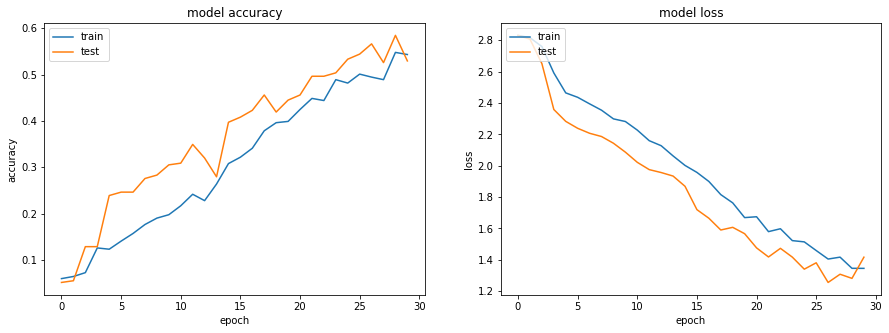

In [18]:
#Plot Loss and accuracy
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()

## Save Model

In [20]:
# Calling `save('model')` creates a Model folder `model`.
AlexNet_model.save("AlexNet")

In [22]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("AlexNet")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [24]:
reconstructed_loss, reconstructed_accuracy = reconstructed_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", reconstructed_loss)
print("Test accuracy:", reconstructed_accuracy)

/Users/chenyu/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Test loss: 1.4162681874106913
Test accuracy: 0.5294118
